# **1.** **Importing Modeling** & **Feature Engineering** liberaries

In [7]:
import seaborn as sns
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import BaggingClassifier
# from sklearn.ensemble import
from sklearn.ensemble import StackingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

## **1.1.** Setting style to **ggplot**

In [8]:
plt.style.use('ggplot')
%matplotlib inline

## **1.2.** Setting plot **Size**, **Font** & **Mode**

In [9]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

plt.rc('font' , **font)
plt.rcParams['savefig.dpi'] = 480
plt.rcParams["figure.figsize"] = (40, 30)

# **2.** Importing Data to **DataFram**

In [10]:
train_df = pd.read_csv("./resources/originalData/train.csv").drop(columns=['ID'])
test_df = pd.read_csv("./resources/originalData/test.csv")
train_data_count = train_df.count()[0]
print("Train data samples count:",train_data_count)

Train data samples count: 10834


## **2.1. Merging DataFrams**

In [11]:
train_data_count = train_df.count()
dry_bean_df = pd.concat([train_df,test_df],axis=0)
dry_bean_y_df = dry_bean_df['y']
dry_bean_x_df = dry_bean_df.drop(columns=['y'])

In [12]:
train_df.y.value_counts()

DERMASON    2837
SIRA        2109
SEKER       1621
HOROZ       1488
CALI        1304
BARBUNYA    1057
BOMBAY       418
Name: y, dtype: int64

# **3.** Feature Engineering

## **3.1** Standardization

In [13]:
standered_scaler = StandardScaler()
train_standardized = pd.DataFrame(standered_scaler.fit_transform(train_df.drop(columns='y')),columns=train_df.drop(columns='y').columns.to_list())
test_standardized = standered_scaler.transform(test_df.drop(columns='ID'))

## **3.2.** PCA

In [14]:
# pca = PCA(n_components=9)
# pca_x_data = pca.fit_transform(train_standardized)

In [15]:
# pca_df = pd.concat([pd.DataFrame(pca_x_data),train_df['y']],axis=1)

## **3.3.** T-SNE

In [16]:
# X_embedded = TSNE(n_components=2,perplexity=200, learning_rate=500, n_iter=1000).fit_transform(train_standardized)

In [17]:
# tsne_df = pd.DataFrame(X_embedded,columns=["axis1","axis2"])

In [18]:
# sns.scatterplot(data=tsne_df,x="axis1",y="axis2",hue=train_df['y'])

### Construct **train** dataframe from **tsne** and **pca**

In [19]:
# train_transformed =  pd.concat([train_standardized,tsne_df,train_df['y']],axis=1)
train_transformed = train_standardized#.drop(columns=['ShapeFactor3','Compactness','AspectRation','Area','MajorAxisLength','MinorAxisLength','ConvexArea','EquivDiameter','ShapeFactor1'])

In [20]:
train_transformed.sample(1)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
3916,-0.39,-0.46,-0.51,-0.21,-0.61,-0.38,-0.39,-0.39,1.35,0.14,0.70,0.53,0.07,0.43,0.51,-0.33


In [21]:
train_transformed_x , x_val, train_transformed_y, y_val = train_test_split(train_transformed,train_df['y'],test_size=0.2,random_state=42)

## **3.4.** Balance clases

In [22]:
train_transformed_y.value_counts()

DERMASON    2282
SIRA        1686
SEKER       1285
HOROZ       1200
CALI        1050
BARBUNYA     825
BOMBAY       339
Name: y, dtype: int64

In [23]:
train_df.y.unique().tolist()

['HOROZ', 'SEKER', 'DERMASON', 'SIRA', 'BARBUNYA', 'CALI', 'BOMBAY']

In [24]:
weights = dict(zip(train_df.y.unique(),[1200,1285,2282,1686,825,1050,339]))

In [25]:
smote = SMOTE(sampling_strategy=weights)
x_smote_balance,y_smote_balance = smote.fit_resample(train_transformed_x,train_transformed_y)

# ***4. SVM Model***

In [26]:
train_df.y.unique().tolist()

['HOROZ', 'SEKER', 'DERMASON', 'SIRA', 'BARBUNYA', 'CALI', 'BOMBAY']

In [27]:
weights = dict(zip(train_df.y.unique(),[ 1, 1, 2, 2, 3, 2, 1]))

In [28]:
support_vector_machine = SVC(C=1, kernel='rbf', degree=3, gamma='scale' ,coef0=0.0, shrinking=True, probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=42)

## **4.2. Confusion Matrix** evaluation

In [29]:
support_vector_machine.fit(x_smote_balance,y_smote_balance)
y_pred_proba = support_vector_machine.predict_proba(x_val)
y_pred = support_vector_machine.predict(x_val)

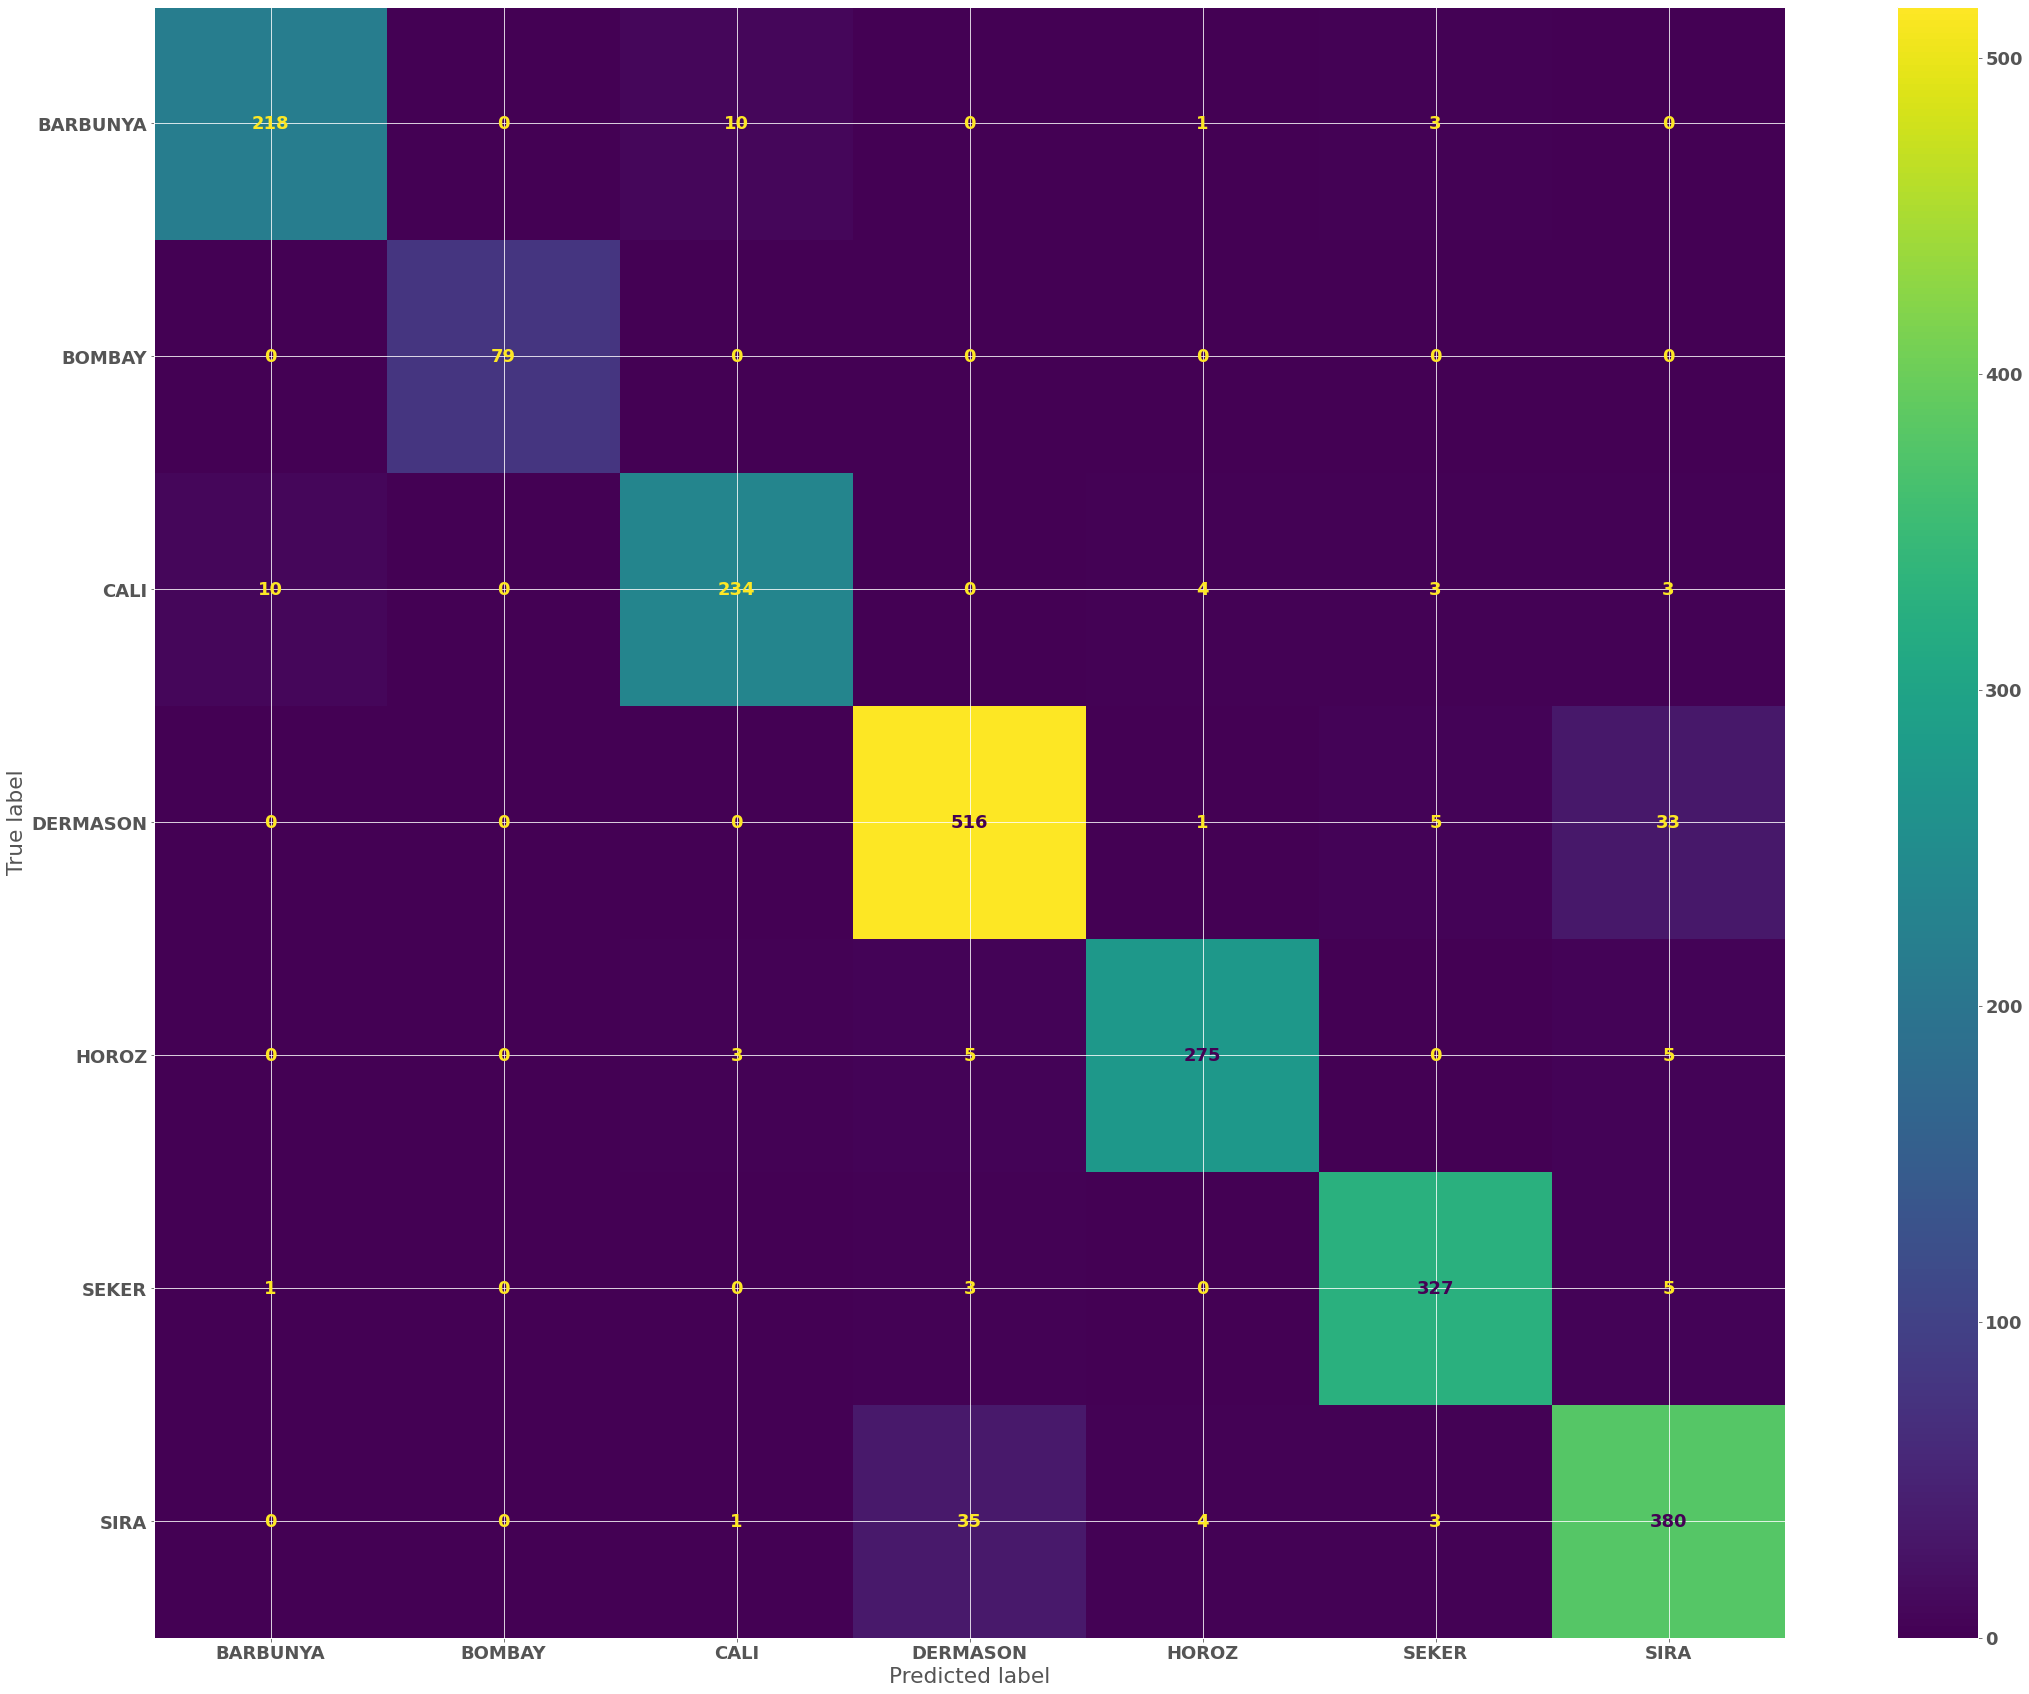

In [30]:
plot_confusion_matrix(support_vector_machine,x_val,y_val)

In [31]:
print(classification_report(y_true=y_val,y_pred=y_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.95      0.94      0.95       232
      BOMBAY       1.00      1.00      1.00        79
        CALI       0.94      0.92      0.93       254
    DERMASON       0.92      0.93      0.93       555
       HOROZ       0.96      0.95      0.96       288
       SEKER       0.96      0.97      0.97       336
        SIRA       0.89      0.90      0.90       423

    accuracy                           0.94      2167
   macro avg       0.95      0.95      0.95      2167
weighted avg       0.94      0.94      0.94      2167



In [32]:
print('Accuracy:',accuracy_score(y_val,y_pred))

Accuracy: 0.936317489616982


In [42]:
from lazypredict.Supervised import LazyClassifier

def lazy_pridict(X,Y,top_model_num=10):
    lazy_model = LazyClassifier(verbose=0,ignore_warnings=True,custom_metric=None)
    # x_train,x_val,y_train,y_val = train_test_split(X,Y,test_size=0.2,random_state=42)
    _ ,test=lazy_model.fit(X,x_val,Y,y_val)
    display(test.head(top_model_num))

lazy_pridict(x_smote_balance,y_smote_balance)

100%|██████████| 29/29 [00:28<00:00,  1.01it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SVC,0.94,0.95,None,0.94,0.60
LGBMClassifier,0.93,0.94,None,0.93,1.75
XGBClassifier,0.93,0.94,None,0.93,3.60
LogisticRegression,0.93,0.94,None,0.93,0.49
KNeighborsClassifier,0.93,0.94,None,0.93,0.21
CalibratedClassifierCV,0.92,0.94,None,0.92,3.24
LinearSVC,0.92,0.94,None,0.92,1.01
ExtraTreesClassifier,0.93,0.93,None,0.93,0.77
RandomForestClassifier,0.93,0.93,None,0.93,3.02


# Find **DERMASON and SIRA** overlapping regions study

In [33]:
overlapp_df = pd.concat([train_transformed,train_df['y']],axis=1)

In [34]:
y_pred_proba_df = pd.concat([pd.DataFrame(y_pred_proba,columns=sorted(train_df.y.unique().tolist())),pd.Series(y_pred,name="y_pred"),y_val.reset_index(drop=True)],axis=1)
y_pred_proba_df.index = y_val.index

In [35]:
overlapping_range_1_index = y_pred_proba_df[((y_pred!=y_val)) & ((y_pred_proba_df.y_pred=='DERMASON') & (y_pred_proba_df.y=='SIRA')) | ((y_pred_proba_df.y_pred=='SIRA') & (y_pred_proba_df.y=='DERMASON'))].index

In [36]:
overlapp_df[overlapp_df.index.isin(overlapping_range_1_index)].describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,68.00,68.00,68.00,68.00,68.00,68.00,68.00,68.00,68.00,68.00,68.00,68.00,68.00,68.00,68.00,68.00
mean,-0.49,-0.55,-0.53,-0.49,-0.23,0.01,-0.49,-0.53,-0.04,0.18,0.33,0.15,0.49,0.28,0.11,0.27
std,0.08,0.10,0.14,0.16,0.37,0.37,0.08,0.11,0.81,0.50,0.41,0.39,0.26,0.30,0.39,0.49
min,-0.67,-0.86,-0.92,-0.87,-1.02,-0.98,-0.68,-0.80,-1.81,-1.63,-1.17,-0.76,0.02,-0.41,-0.78,-1.82
25%,-0.54,-0.62,-0.61,-0.60,-0.47,-0.21,-0.54,-0.60,-0.67,-0.09,0.09,-0.08,0.28,0.09,-0.11,0.09
50%,-0.49,-0.54,-0.56,-0.50,-0.28,-0.00,-0.49,-0.52,-0.10,0.26,0.37,0.19,0.48,0.28,0.15,0.39
75%,-0.42,-0.46,-0.45,-0.37,-0.04,0.23,-0.42,-0.43,0.68,0.54,0.58,0.40,0.65,0.47,0.37,0.62
max,-0.37,-0.37,-0.18,-0.18,0.71,0.78,-0.38,-0.36,1.72,1.13,1.13,1.02,1.13,1.10,1.01,1.03


In [37]:
val = overlapp_df[train_transformed.index.isin(overlapping_range_1_index)]

In [38]:
plot=overlapp_df[overlapp_df.Perimeter.between(-0.85,-0.32)]
index_ds = plot.index

In [39]:
plot = plot[~plot.index.isin(overlapping_range_1_index)]

In [548]:
from sklearn.ensemble import AdaBoostClassifier

train_x_ds , x_val_ds, train_y_ds, y_val_ds = train_test_split(plot[(plot.y=='DERMASON')|(plot.y=='SIRA')].drop(columns=['y']),plot[(plot.y=='DERMASON')|(plot.y=='SIRA')]['y'],test_size=0.2,random_state=42)
extra_tree = AdaBoostClassifier(ExtraTreesClassifier(),n_estimators=100)
extra_tree.fit(train_x_ds,train_y_ds)
# y_pred_proba = support_vector_machine.predict_proba(x_val)
y_pred_ds = extra_tree.predict(x_val_ds)

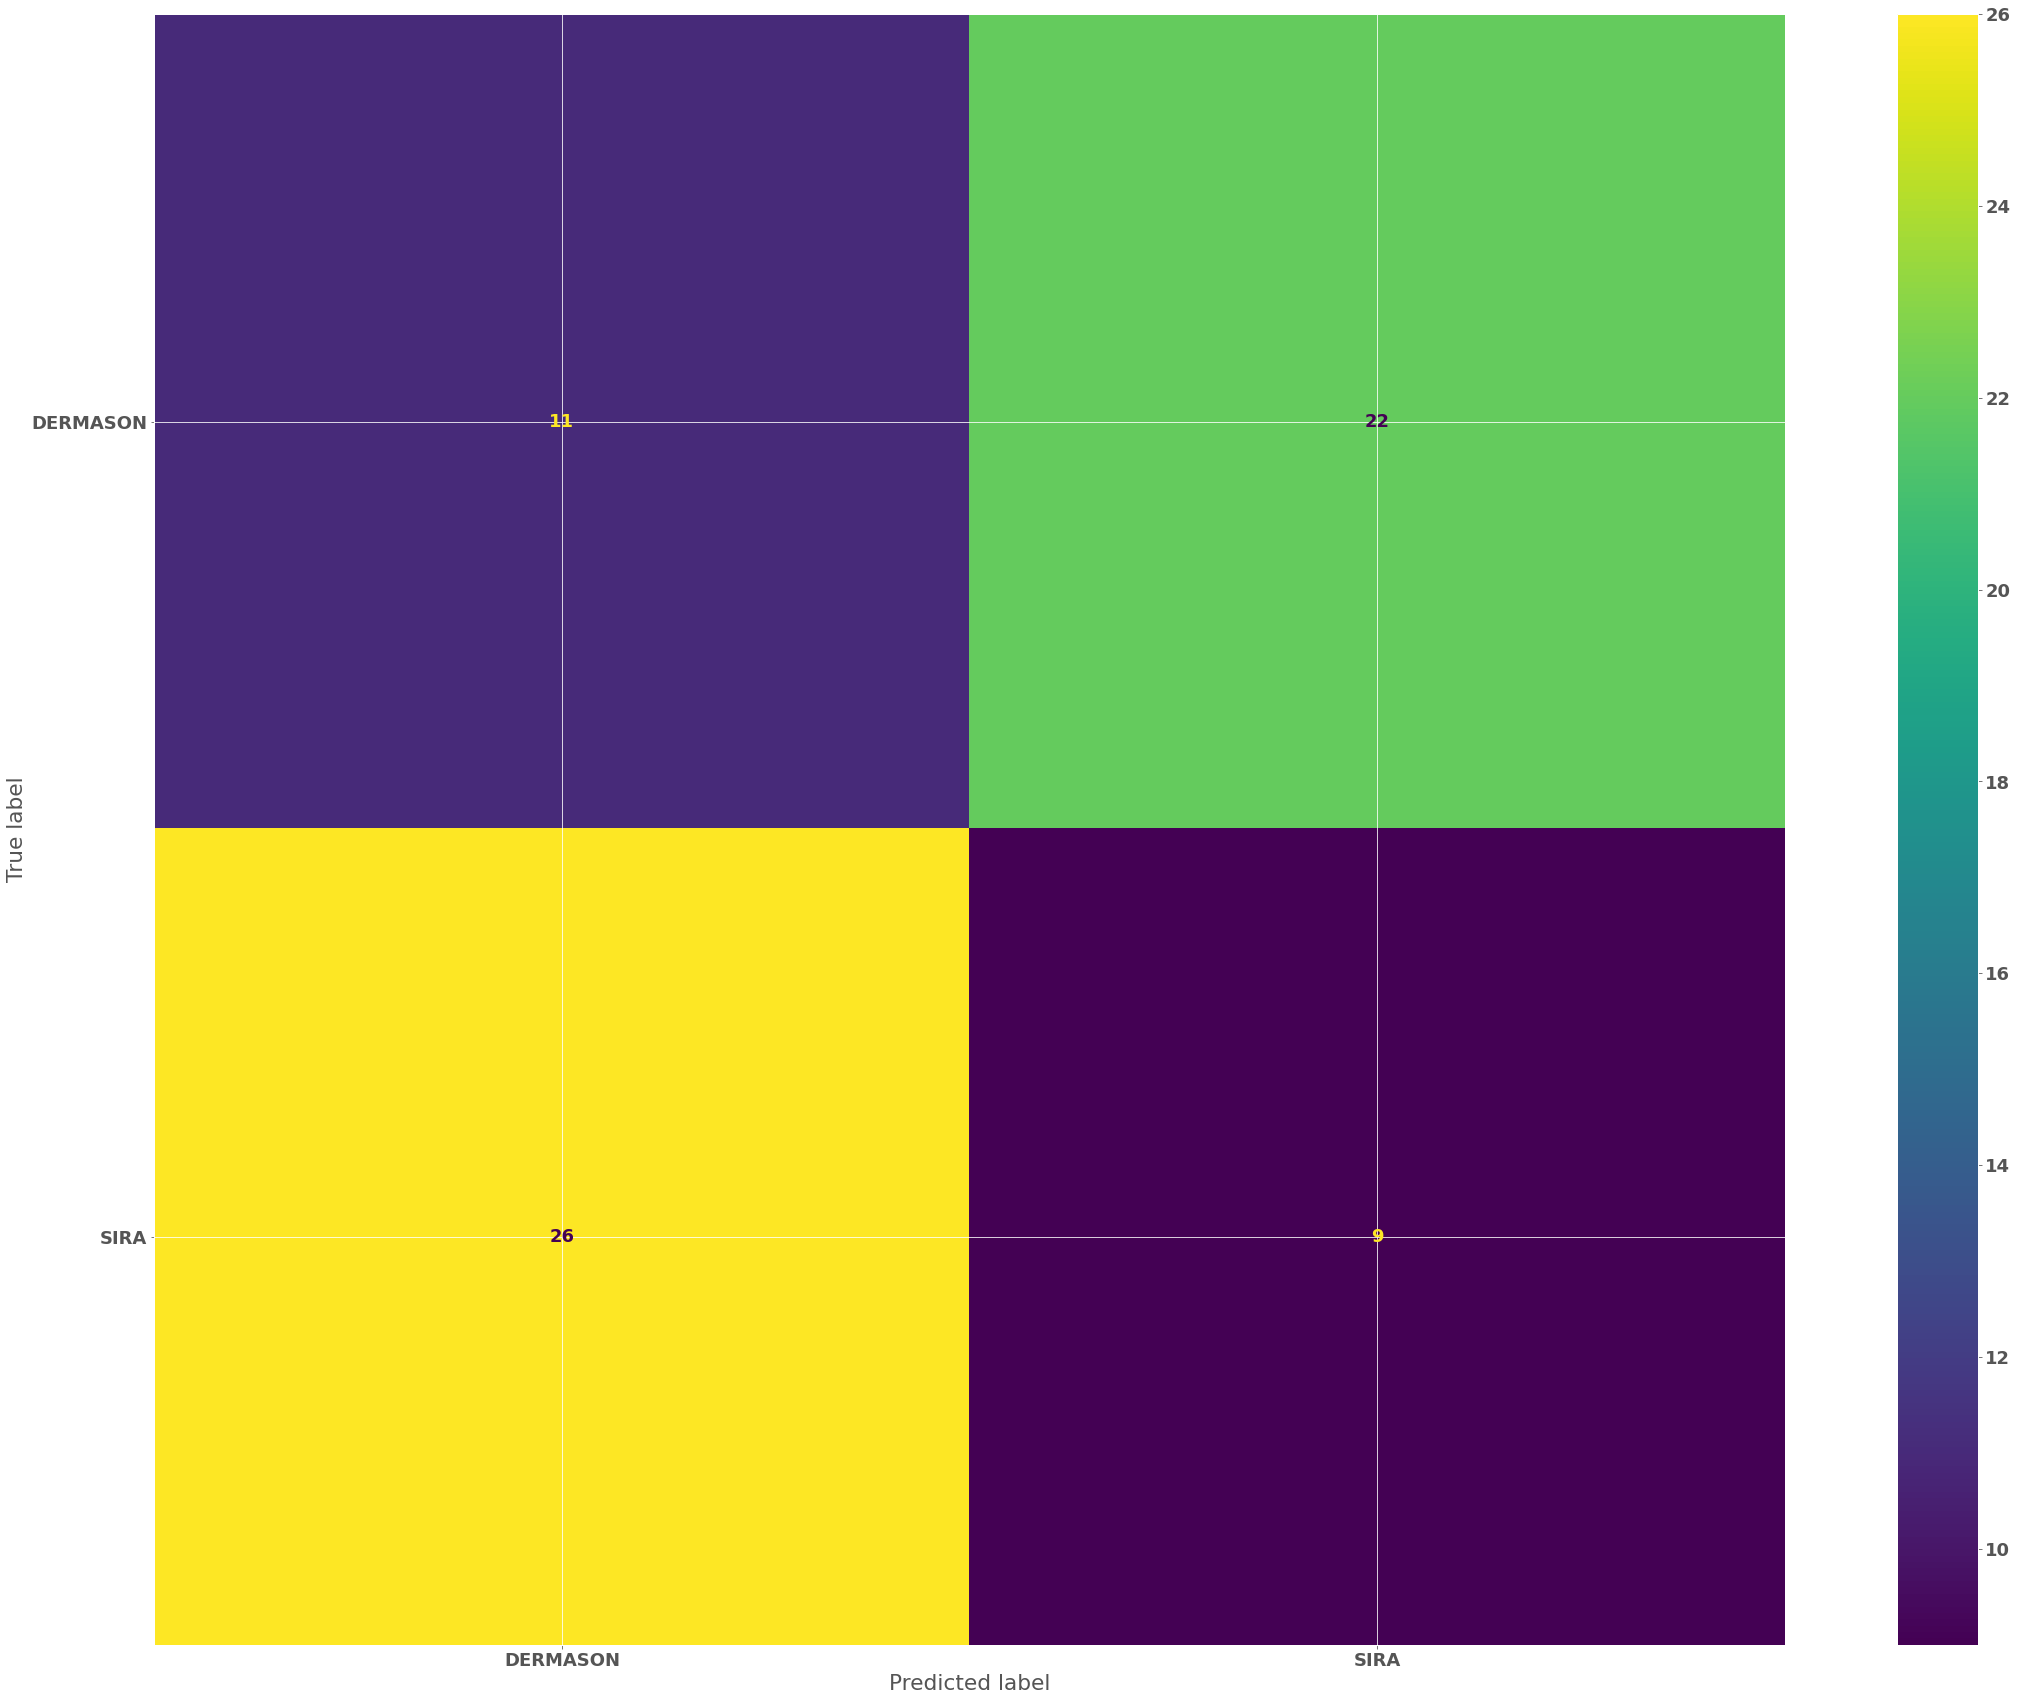

In [549]:
plot_confusion_matrix(extra_tree,val.drop(columns='y'),val['y'])

In [550]:
print(classification_report(y_true=y_val_ds,y_pred=y_pred_ds))

              precision    recall  f1-score   support

    DERMASON       0.85      0.86      0.86       242
        SIRA       0.81      0.80      0.80       181

    accuracy                           0.83       423
   macro avg       0.83      0.83      0.83       423
weighted avg       0.83      0.83      0.83       423



# Compining Model

In [551]:
y_pred_sr = pd.Series(y_pred,name='y_pred')
y_pred_sr.index = y_val.index
val_index = y_pred_sr[y_pred_sr.index.isin(index_ds)].index
y_val_st_1 = y_val[y_val.index.isin(val_index)]
y_val_st_1 = y_val_st_1[(y_val_st_1=='DERMASON')|(y_val_st_1=='SIRA')]
y_val_index = y_val_st_1.index
x_val_st_1 = x_val[x_val.index.isin(y_val_index)]
y_pred_st_1 = y_pred_sr[y_pred_sr.index.isin(val_index)]

In [552]:
y_pred_st_2 = extra_tree.predict(x_val_st_1)
y_pred_st_2_sr = pd.Series(y_pred_st_2,name='y_pred_st_2')
y_pred_st_2_sr.index = y_val_st_1.index

In [553]:
final_r = pd.concat([y_pred_sr.drop(index=y_pred_st_2_sr.index.to_list(),axis=0),y_pred_st_2_sr],axis=0).sort_index()
sorted_y_val = y_val.sort_index()
sorted_labels = sorted(train_df['y'].unique().tolist())

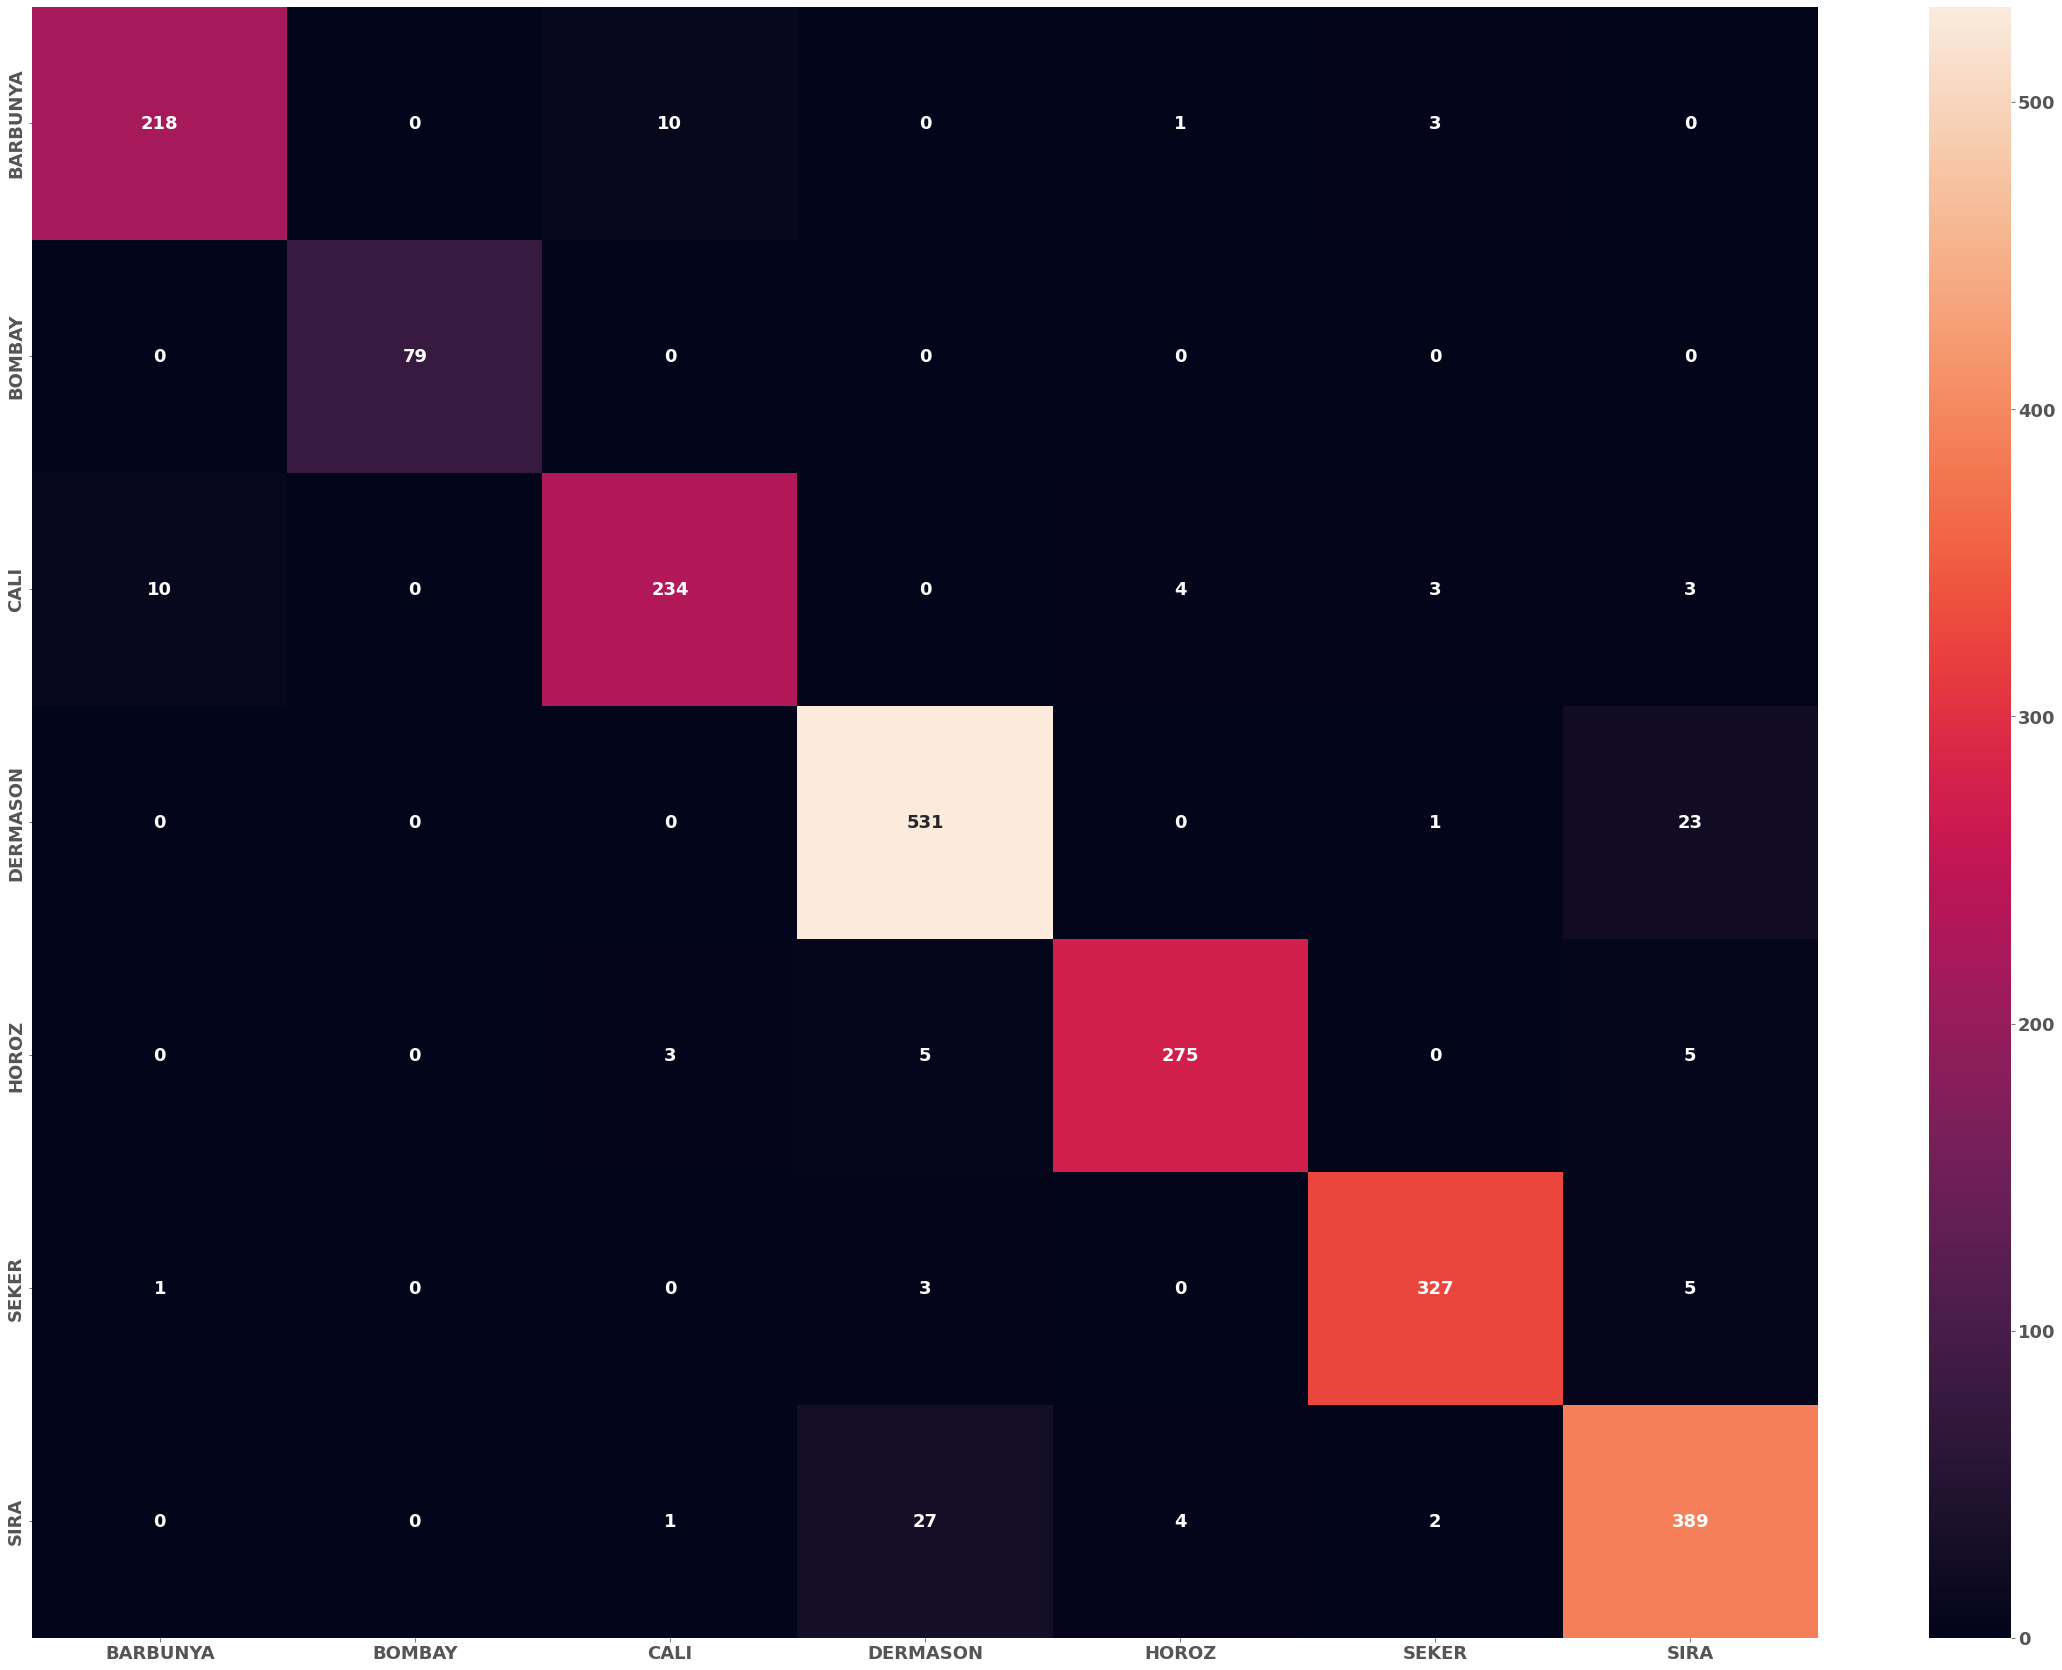

In [554]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(sorted_y_val, final_r, labels=sorted_labels)
sns.heatmap(conf_mat,annot=True,xticklabels=sorted_labels,yticklabels=sorted_labels,fmt='g');

In [555]:
print(classification_report(y_true=sorted_y_val,y_pred=final_r))

              precision    recall  f1-score   support

    BARBUNYA       0.95      0.94      0.95       232
      BOMBAY       1.00      1.00      1.00        79
        CALI       0.94      0.92      0.93       254
    DERMASON       0.94      0.96      0.95       555
       HOROZ       0.97      0.95      0.96       288
       SEKER       0.97      0.97      0.97       336
        SIRA       0.92      0.92      0.92       423

    accuracy                           0.95      2167
   macro avg       0.96      0.95      0.95      2167
weighted avg       0.95      0.95      0.95      2167



In [556]:
print('Accuracy:',accuracy_score(sorted_y_val,final_r))

Accuracy: 0.9473927088140286


# Find **BARBUNYA and CALI** overlapping regions study

In [406]:
# y_pred_proba_df = pd.concat([pd.DataFrame(y_pred_proba,columns=sorted(train_df.y.unique().tolist())),pd.Series(y_pred,name="y_pred"),y_val.reset_index(drop=True)],axis=1)
# y_pred_proba_df.index = y_val.index

In [407]:
# y_pred_proba_df[((y_pred!=y_val)) & ((y_pred_proba_df.y_pred=='CALI') & (y_pred_proba_df.y=='BARBUNYA')) | ((y_pred_proba_df.y_pred=='BARBUNYA') & (y_pred_proba_df.y=='CALI'))]

# ***5. Observations***

## **First** Observation, Preprocessing (**Standardization**):
* ### Model confused between **Sira** and **Dermason** **70** smaple miss classified
* ### Model confused between **Cali** and **Barbounya** **20** samples miss classified
* ### **Accuracy** score 94% and avarage **Accuracy** 92.77%
* ### Looking to improve **Dermason , Cali and Sira** scores which are the **worest** **F1** scores **93%,93%,89%**

## **Second** Observation, Preprocessing (**Standardization**,**Smote**):
* ### Model confused between **Sira** and **Dermason** **70** smaple miss classified
* ### Model confused between **Cali** and **Barbounya** **20** samples miss classified
* ### **Accuracy** score 94% and avarage **Accuracy** 94.6%
* ### Looking to improve **Dermason , Cali and Sira** scores which are the **worest** **F1** scores **93%,93%,90%**

# **6.** Submission file **generation**

In [ ]:
# pca_test_data = pca.fit_transform(test_standardized)
# pca_test_df = pd.DataFrame(pca_test_data)
# X_test_embedded = TSNE(n_components=3,perplexity=200, learning_rate=500, n_iter=1000).fit_transform(test_standardized)
# tsne_test_df = pd.DataFrame(X_test_embedded,columns=["axis1","axis2",'axis3'])
# test_transformed =  pd.concat([pca_test_df,tsne_test_df],axis=1)

In [ ]:
# test_transformed = test_standardized

In [ ]:
# sub_df = pd.concat([test_df['ID'].reset_index(drop=True),pd.Series(support_vector_machine.predict(test_transformed),name='y')],axis=1)

In [ ]:
# sub_df.y.value_counts()

In [558]:
# final_r.to_csv("/kaggle/working/submission.csv",index=False)